In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [38]:
# Деление датасета на тестовую и обучающую выборку


In [39]:
(x_train, y_train ), (x_test, y_test) = fashion_mnist.load_data()

In [40]:
class_names = ['T-shirt/top',  'Trouser', 'Pullower', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
#Предварительная обработка

In [42]:
#Просмотр изображений


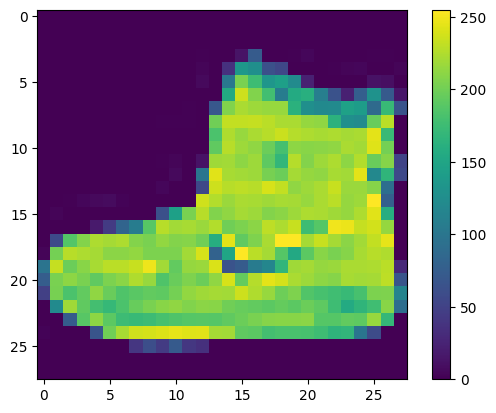

In [43]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [44]:
#Нормализация данных


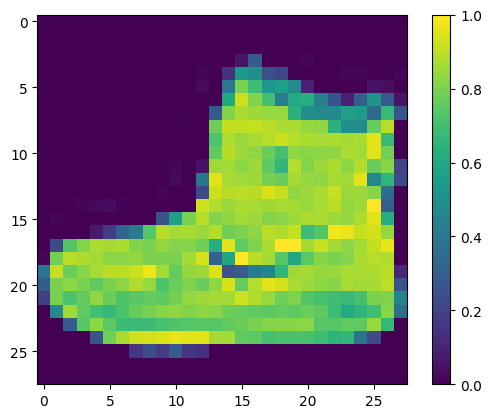

In [45]:
x_train = x_train/255
x_test = x_test/255
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

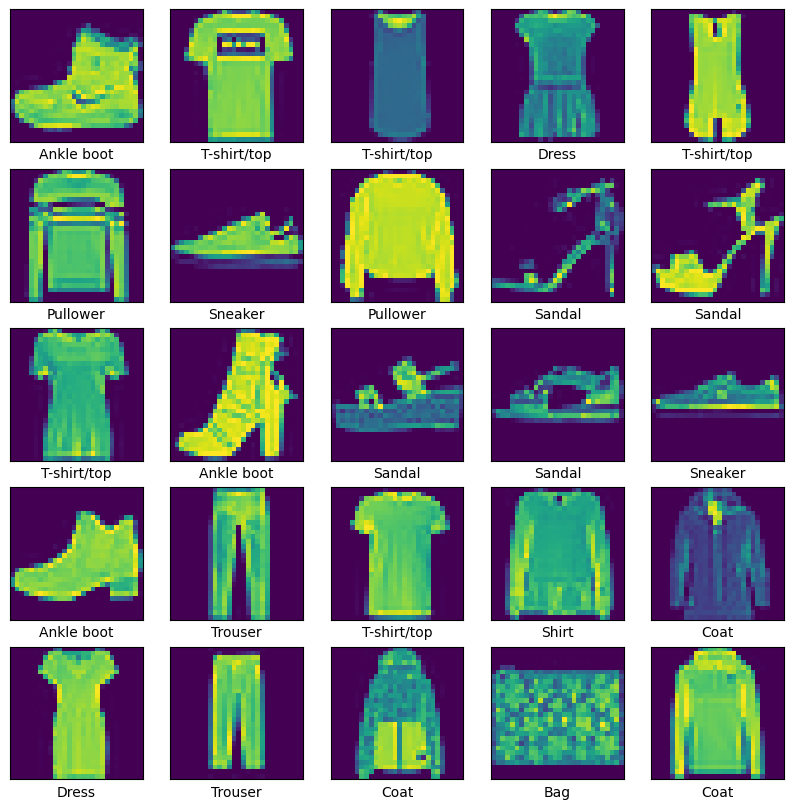

In [46]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

In [47]:
#Создание модели нейронной сети

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation ="relu" ),
    keras.layers.Dense(10, activation = "softmax")
])

In [49]:
#Компиляция моддели


In [54]:
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
#Обучение модели


In [55]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7439 - accuracy: 0.7581
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5136 - accuracy: 0.8273
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4703 - accuracy: 0.8394
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4462 - accuracy: 0.8459
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4299 - accuracy: 0.8516
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4157 - accuracy: 0.8562
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4038 - accuracy: 0.8596
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3934 - accuracy: 0.8625
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3843 - accuracy: 0.8662
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.376

In [ ]:
#Проверка точности предсказания


In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8545
Test accuracy:  0.8544999957084656


In [ ]:
#ПРедсказываем изображения


In [59]:
predictions = model.predict(x_train)
predictions[12]

1875/1875 [==============================] - 4s 2ms/step


array([2.4985260e-04, 1.6373784e-04, 2.2052485e-04, 1.5930078e-04,
       7.7343757e-05, 9.8150796e-01, 1.0085450e-03, 1.0395564e-02,
       2.2456024e-03, 3.9715338e-03], dtype=float32)

In [60]:
np.argmax(predictions[12])

5

In [61]:
y_train[12]


5

'Sandal'

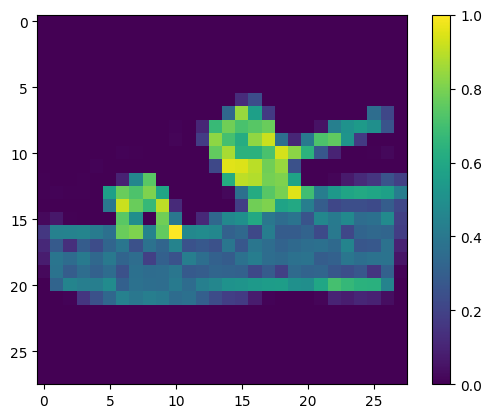

In [62]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)
class_names[np.argmax(predictions[12])]